In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Online%20Purchase.csv")

In [ ]:
df.head()

,Customer_ID,Gender,Age,Salary,Purchased
0,1,Male,35,500,0
1,2,Female,25,300000,1
2,3,Female,100,200000,0
3,15566689,Female,35,57000,0
4,15569641,Female,58,95000,1


In [ ]:
df.dtypes

Customer_ID     int64
Gender         object
Age             int64
Salary          int64
Purchased       int64
dtype: object

# **What is the size (number of rows and columns) of the dataset?**

In [ ]:
df.shape

(403, 5)

# **What are the unique values in the "Gender" column?**

In [ ]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

# **What is the average age of customers in the dataset?**

In [ ]:
df["Age"].mean()

37.77171215880893

# **What is the minimum and maximum salary among the customers?**

In [ ]:
print("Minimum salary among the customers : ",df["Salary"].min())

Minimum salary among the customers :  500


In [ ]:
print("Maximum salary among the customers : ",df["Salary"].max())

Maximum salary among the customers :  300000


# **How many customers made a purchase (Purchased=1) in the dataset?**

In [ ]:
df["Purchased"].value_counts()

0    259
1    144
Name: Purchased, dtype: int64

# **How many customers did not make a purchase (Purchased=0) in the dataset?**

In [ ]:
 a = df[df["Purchased"]==0]
 a["Purchased"].count()

259

# **What is the gender distribution among customers who made a purchase?**

In [ ]:
result = df[df["Purchased"]==1]
result["Gender"].value_counts()

Female    78
Male      66
Name: Gender, dtype: int64

# **What is the average age of customers who made a purchase?**

In [ ]:
a = df[df["Purchased"]==1]
a["Age"].mean()

46.24305555555556

# **What is the average salary of customers who made a purchase?**

In [ ]:
a["Salary"].mean()

87756.94444444444

# **Create a histogram of customer ages.**

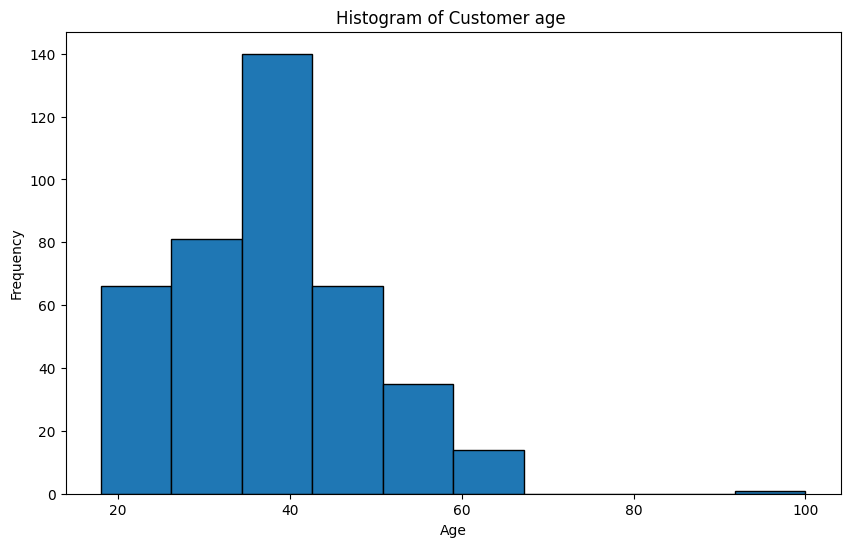

In [ ]:
df["Age"].plot(kind = "hist" , edgecolor = "black" , figsize=(10,6))
plt.xlabel("Age")
plt.title("Histogram of Customer age ")
plt.show()

# **Create a box plot of customer salaries.**

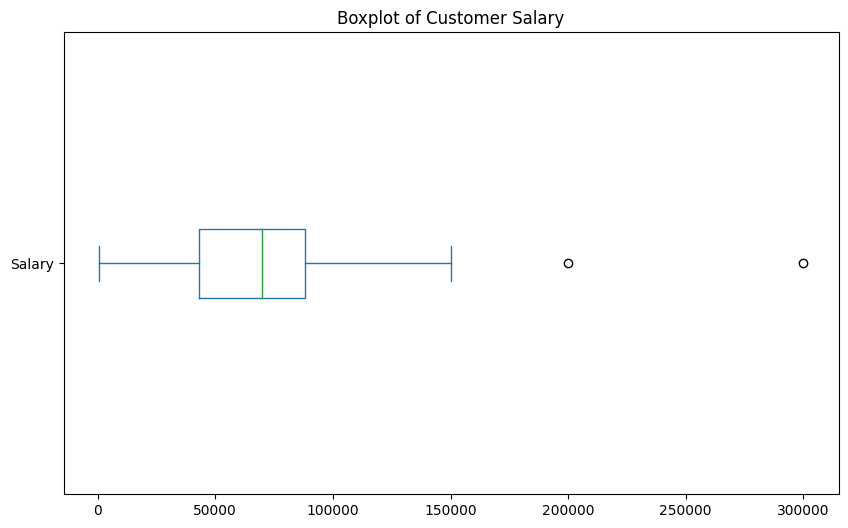

In [ ]:
df["Salary"].plot(kind="box"  , figsize=(10,6) , vert=False)
plt.title("Boxplot of Customer Salary")
plt.show()

# **What is the correlation between age and salary in the dataset?**

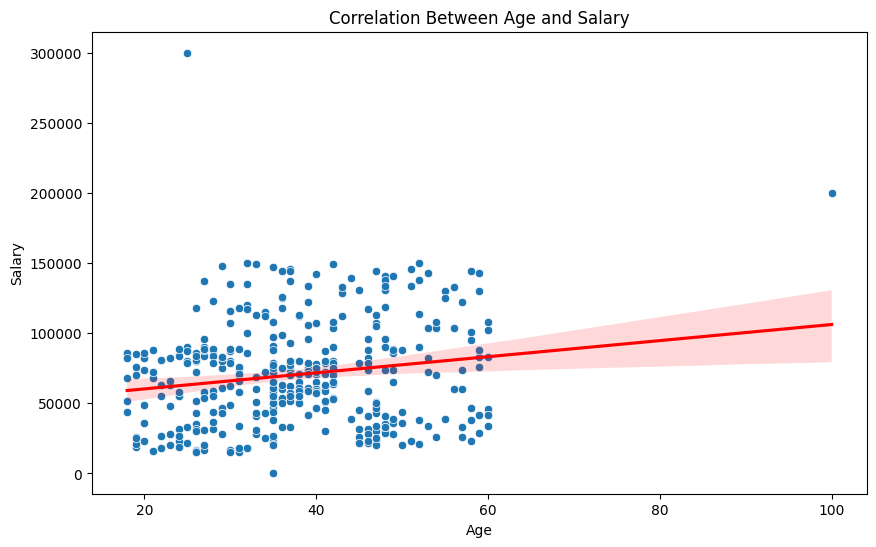

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = "Age" , y= "Salary" , data = df)
sns.regplot(x = "Age" , y= "Salary" , data = df , scatter=False , color ="red")
plt.title("Correlation Between Age and Salary")
plt.show()

**or**

In [ ]:
df["Age"].corr(df["Salary"])

0.17122112771641626

# **Are there any outliers in the salary column? If so, how many?**

<Axes: >

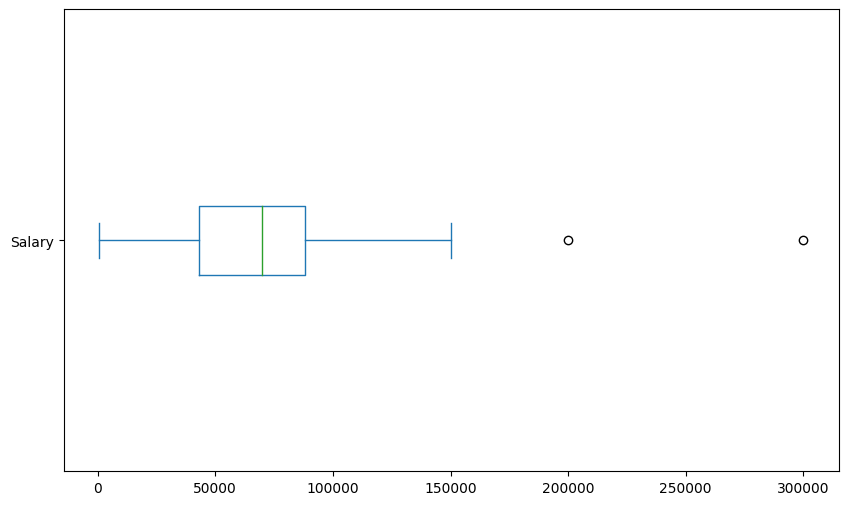

In [ ]:
df["Salary"].plot(kind = "box" , vert=False , figsize=(10,6))

**There are 2 outlier**

# **Plot a bar chart showing the count of purchases by gender.**

In [ ]:
a = df[df["Purchased"]==1]
gender_count = a["Gender"].value_counts()

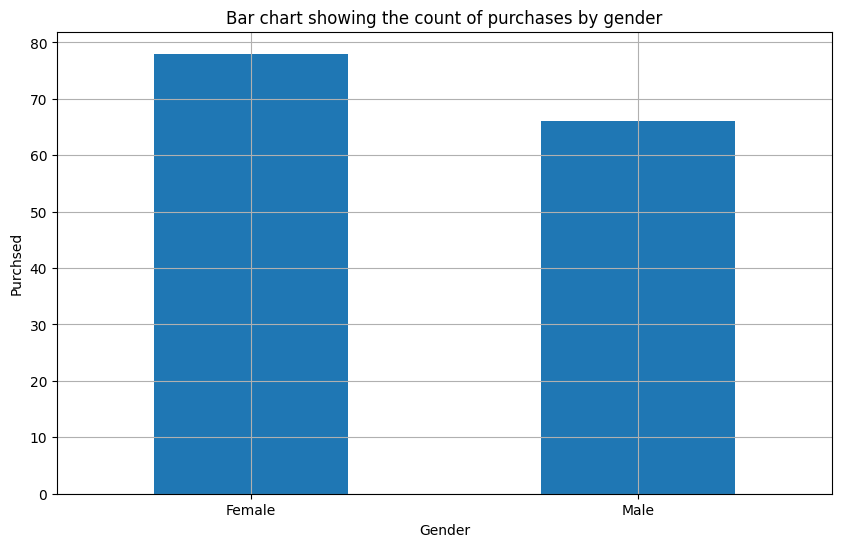

In [ ]:
gender_count.plot(kind = "bar" , figsize=(10,6))
plt.xlabel("Gender")
plt.xticks(rotation = 0)
plt.ylabel("Purchsed")
plt.title("Bar chart showing the count of purchases by gender")
plt.grid(True)
plt.show()

# **What is the percentage of customers who made a purchase?**

In [ ]:
purchase_customer = df[df["Purchased"]==1]["Customer_ID"].count()
total_customer = df["Customer_ID"].nunique()

percentage = (purchase_customer / total_customer) *100
percentage

35.73200992555831

# **Calculate the mean salary for male and female customers separately.**

In [ ]:
df.groupby("Gender")["Salary"].mean()

Gender
Female    73490.291262
Male      67302.030457
Name: Salary, dtype: float64

# **What is the average age of customers who made a purchase, grouped by gender?**

In [ ]:
purchase_customer = df[df["Purchased"] == 1]

avg_age = purchase_customer.groupby("Gender")["Age"].mean()
avg_age

Gender
Female    46.871795
Male      45.500000
Name: Age, dtype: float64

# **Perform a chi-squared test to determine if there is a significant association between gender and purchase.**

In [ ]:
contingency_table = pd.crosstab(df["Age"],df["Purchased"])

In [ ]:
from scipy.stats import chi2_contingency

chi2 , p , _, _= chi2_contingency(contingency_table)

print("Chi-Squared Statistic:", chi2)
print("p-value:", p)

Chi-Squared Statistic: 204.76819184337785
p-value: 6.251936339303087e-23


# **Create a scatter plot of age vs. salary, with points colored by gender.**

In [ ]:
df["Gender"]

0        Male
1      Female
2      Female
3      Female
4      Female
        ...  
398      Male
399      Male
400      Male
401      Male
402    Female
Name: Gender, Length: 403, dtype: object

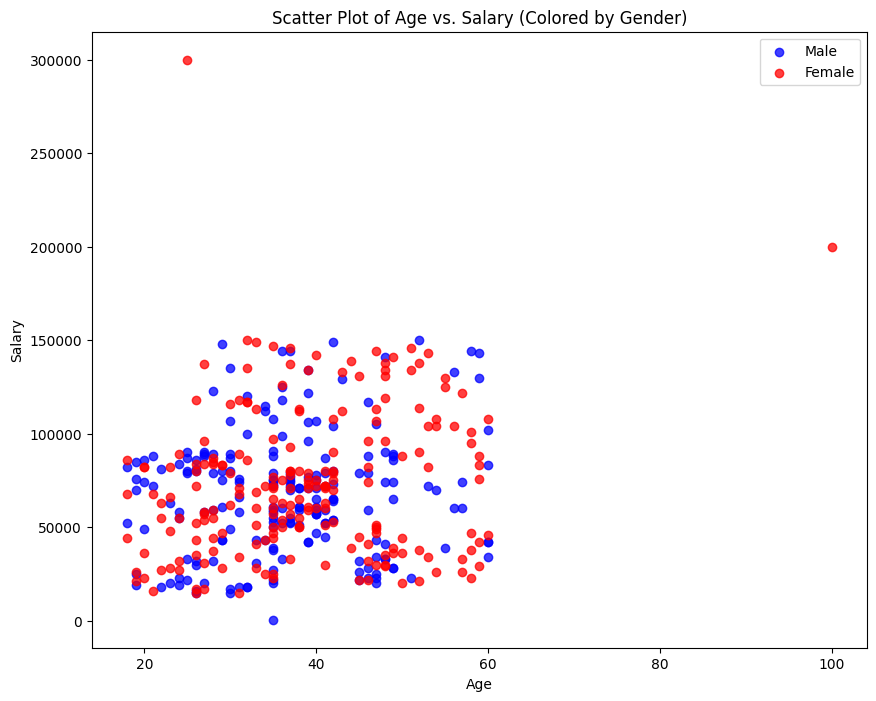

In [ ]:
male = df[df["Gender"] == "Male"]
female = df[df["Gender"]=="Female"]

plt.figure(figsize=(10,8))
plt.scatter(male["Age"] , male["Salary"] , color = "blue" , label ="Male" , alpha = 0.75)
plt.scatter(female["Age"] , female["Salary"] , color = "red" , label ="Female" , alpha = 0.75)
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Scatter Plot of Age vs. Salary (Colored by Gender)")
plt.legend()
plt.show()

# **Calculate the average age for customers who made a purchase and have a salary above 50,000.**

In [ ]:
filtered_df = df[(df['Purchased'] == 1) & (df['Salary'] > 50000)]
average_age = filtered_df['Age'].mean()
average_age

44.33

**or**

In [ ]:
purchase_customer = df[df["Purchased"] == 1]

salary_above50000 = purchase_customer[purchase_customer["Salary"] > 50000]

answer = salary_above50000["Age"].mean()
answer

44.33

# **Create a new column that categorizes customers into age groups (e.g., 18-30, 31-45, 46-60, 61+), and then calculate the average salary for each group.**

In [ ]:
age_bins = (18 , 31 , 46 , 61,df["Age"].max())
age_label= ("18-30" , "31-45" , "46-60" , "61+")

df["Age_group"] = pd.cut(df["Age"] , bins=age_bins , labels = age_label , right = False)

avg_salary_by_avg_age = df.groupby("Age_group")["Salary"].mean().reset_index()

In [ ]:
df.head()

,Customer_ID,Gender,Age,Salary,Purchased,Age_group
0,1,Male,35,500,0,31-45
1,2,Female,25,300000,1,18-30
2,3,Female,100,200000,0,NaN
3,15566689,Female,35,57000,0,31-45
4,15569641,Female,58,95000,1,46-60


# **Calculate the median salary for customers who made a purchase and are aged 30 or younger.**

In [ ]:
filtered = df[(df['Age'] < 30) & (df["Purchased"]==1)]

filtered["Salary"].median()

137000.0

# **Perform a t-test to compare the average salary of male and female customers who made a purchase.**

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
purchase_customer = df[df["Purchased"] ==1]

male = purchase_customer[purchase_customer["Gender"] =="Male"]
female =purchase_customer[purchase_customer["Gender"]=="Female"]

t_statistic , p_value = ttest_ind(male["Salary"] , female["Salary"])
t_statistic , p_value

(-1.0504908187770234, 0.29527700173998367)

# **Build a logistic regression model to predict the likelihood of purchase based on age and gender**

In [ ]:
x = df[["Age" , "Gender"]]
y = df["Purchased"]

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
x['Gender'] = le.fit_transform(x['Gender'])

<ipython-input-139-c1bca7b9152f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Gender'] = le.fit_transform(x['Gender'])


In [ ]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42 )

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train , y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test , y_pred)
print("Accuracy : ",accuracy)

report = classification_report(y_test , y_pred)
print("Classification Report :\n " , report)

cm = confusion_matrix(y_test , y_pred)
print("Confusion Matrix : " , cm)

Accuracy :  0.8271604938271605
Classification Report :
                precision    recall  f1-score   support

           0       0.79      0.96      0.87        48
           1       0.91      0.64      0.75        33

    accuracy                           0.83        81
   macro avg       0.85      0.80      0.81        81
weighted avg       0.84      0.83      0.82        81

Confusion Matrix :  [[46  2]
 [12 21]]


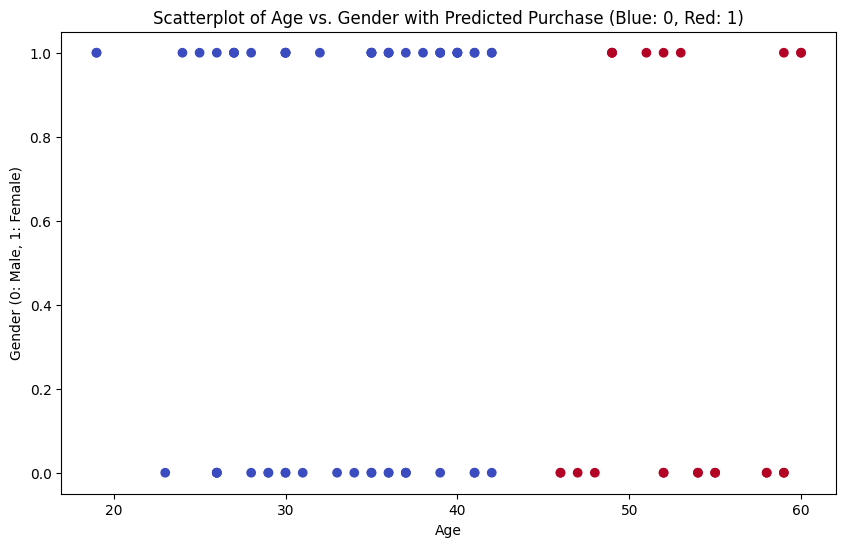

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x_test["Age"] , x_test["Gender"] , c = y_pred , cmap = "coolwarm" , marker = "o")
plt.xlabel("Age")
plt.ylabel("Gender (0: Male, 1: Female)")
plt.title("Scatterplot of Age vs. Gender with Predicted Purchase (Blue: 0, Red: 1)")
plt.show()